In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [26]:
df = pd.read_csv("D:/DAOA_pract/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [27]:
df.shape[1]


14

In [29]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
df = df.dropna()
X = df.drop('target',axis=1).values
print("Feature shape : ",X.shape)
print("Number of Feature : ",X.shape[1])

Feature shape :  (1025, 13)
Number of Feature :  13


In [30]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
print(f"{X_norm.shape}")

(1025, 13)


In [31]:
#Simple Autoencoder 
inp_simple = Input(shape=(X_norm.shape[1],))
encoded_simple = Dense(3, activation='relu', name='encoded_simple')(inp_simple)
decoded_simple = Dense(X_norm.shape[1],activation="sigmoid" , name="decoded_simple")(encoded_simple)

ae_simple = Model(inp_simple,decoded_simple)
encoder_simple = Model(inp_simple,encoded_simple)

ae_simple.compile(optimizer='adam', loss='mse')
print("Simple Autoencoder summary : ")
ae_simple.summary()

Simple Autoencoder summary : 


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoded_simple (Dense)               │ (None, 3)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoded_simple (Dense)               │ (None, 13)                  │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
#Deep autoencoder
inp_deep = Input(shape=(X_norm.shape[1],))
enc1 = Dense(8,activation='relu')(inp_deep)
enc2 = Dense(3,activation='relu',name='bottle_neck')(enc1)
dec1 = Dense(8,activation='relu',name='decoded_deep')(enc2)
decoded_deep = Dense(X_norm.shape[1],activation='sigmoid')(dec1)

ae_deep = Model(inp_deep,decoded_deep)
encoder_deep = Model(inp_deep,enc2)

ae_deep.compile(optimizer='Adam', loss='mse')

print("Deep Autoencoder summary : ")
ae_deep.summary()

Deep Autoencoder summary : 


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottle_neck (Dense)                  │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoded_deep (Dense)                 │ (None, 8)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │             117 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288 (1.12 KB)

 Trainable params: 288 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history_simple = ae_simple.fit(X_norm,X_norm,epochs=20,batch_size=36,shuffle=True,verbose=0)

In [34]:
history_deep = ae_deep.fit(X_norm,X_norm,epochs=20,batch_size=36,shuffle=True,verbose=0)

In [35]:
encoded_simple_data = encoder_simple.predict(X_norm,verbose =0 )
print(f"Simple Autoencoder reduced version : {encoded_simple_data[:10]}")

Simple Autoencoder reduced version : [[1.8278031  1.3651571  1.7056624 ]
 [1.5178862  0.72433734 0.        ]
 [2.098182   0.06568702 0.23583868]
 [1.7285371  1.3442404  1.8326916 ]
 [0.8506662  0.8509097  0.6812072 ]
 [0.68324757 0.7649945  1.2151992 ]
 [1.8297864  0.5030722  0.49439934]
 [2.0042284  0.51501966 0.77532876]
 [1.5790594  1.381712   1.4958977 ]
 [2.2822156  0.22698246 0.33312455]]


In [36]:
encoded_deep_data = encoder_deep.predict(X_norm,verbose =0 )
print(f"Simple Autoencoder reduced version : {encoded_deep_data[:10]}")

Simple Autoencoder reduced version : [[3.424245   0.         1.8566573 ]
 [0.75541383 0.         1.621597  ]
 [2.104118   0.         2.7482355 ]
 [3.948237   0.         2.166975  ]
 [0.         0.7815058  0.        ]
 [2.1205542  0.         0.726945  ]
 [0.97232693 0.18321294 0.80356604]
 [2.070296   0.         2.9020584 ]
 [3.7913682  0.         1.9618042 ]
 [1.3114976  0.01879289 2.2210665 ]]


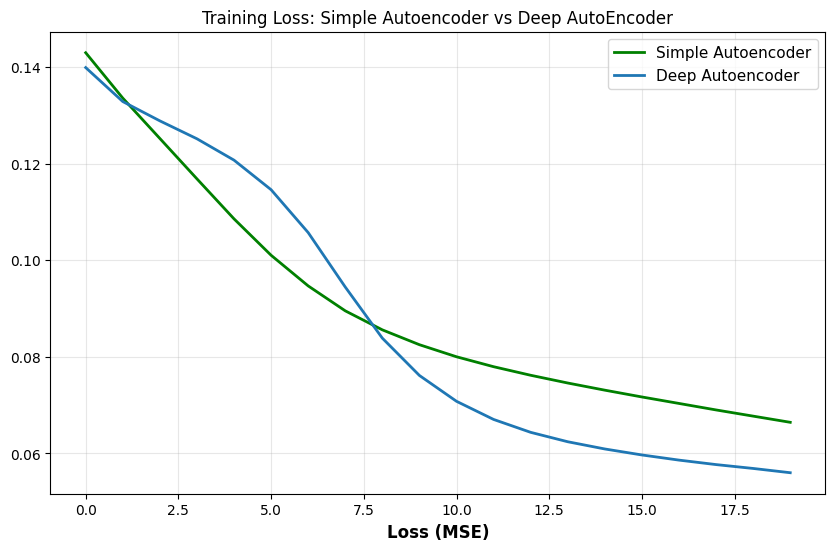

In [38]:
#Plot loss for different autoencoders
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history_simple.history['loss'], label='Simple Autoencoder',linewidth=2,color='green')
plt.plot(history_deep.history['loss'], label='Deep Autoencoder',linewidth=2)
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.xlabel('Loss (MSE)',fontsize=12,fontweight='bold')
plt.title("Training Loss: Simple Autoencoder vs Deep AutoEncoder")
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.show()

In [41]:
#Mean squared error
decoded_simple_data = ae_simple.predict(X_norm,verbose=0)
mse_simple = np.mean((X_norm - decoded_simple_data) ** 2)
print(f"Mean squared error : {mse_simple}")

Mean squared error : 0.06575765511340893


In [42]:
decoded_deep_data = ae_deep.predict(X_norm,verbose=0)
mse_deep = np.mean((X_norm - decoded_deep_data) ** 2)
print(f"Mean squared error : {mse_deep}")

Mean squared error : 0.055225478835246415
